# <center> Anderson Localization <br> in wave phenomena </center>
<p style="text-align:right"><i>Timothy Anderson</i></p>
<b>Python 3</b>

## <center> Table of Content </center>

<ol>
<li><a href="#To-debug">To debug</a></li>
<li><a href="#Full-code">Full code</a></li>
<li><a href="#Decomposed-code-(for-debugging)">Decomposed code (for debugging)</a></li>
<ol>
<li><a href="#Imports">Imports</a></li>
<li><a href="#Input-of-the-setting">Input of the setting</a></li>
<li><a href="#Ordered-eigenvectors'-plots">Ordered eigenvectors' plots</a></li>
<li><a href="#Setting-of-the-random-components">Setting of the random components</a></li>
<li><a href="#Creation-of-the-localized-matrix">Creation of the localized matrix</a></li>
<li><a href="#Localized-eigenvectors'-plots">Localized eigenvectors' plots</a></li>
<li><a href="#Localization-width-over-a-#-of-simulations">Localization width over a # of simulations</a></li>
</ol>
<li><a href="#Bits-of-code">Bits of code</a></li>
</ol>

Generic input values:<br>
Size of the matrix: 
200


Main diagonal's value: 
1


Secondary diagonals' value: 
0.1


#of eigenvectors graphed: 
2


Which eigenvector do you want to graph?: 
1

Which eigenvector do you want to graph?: 
200


Max randomness: 
0.01


Disorder in the main diagonal? (y/n) 
n


Disorder in the secondary diagonals? (y/n) 
y

## To debug

<ol>
<li> Localization width over a certain number of simulations
<li> Get a uniform distribution in the range [-h,h]
<li> Do a wave guide model of Localization (1D)
![title](1d_model.png)
<li> Do a (atomic orbital) 2D model of Localization
![title](2d_model.png)
<li> Do a 3D model of Anderson Localization
![title](3d_model.png)
</ol>

## Full code

Size of the matrix: 
200


Main diagonal's value: 
3


Secondary diagonals' value: 
5


# of eigenvectors graphed: 
3


Which eigenvector do you want to graph?: 
1


Which eigenvector do you want to graph?: 
199


Which eigenvector do you want to graph?: 
50


Max randomness: 
0.03


Disorder in the main diagonal? (y/n) 
y


Disorder in the secondary diagonals? (y/n) 
y




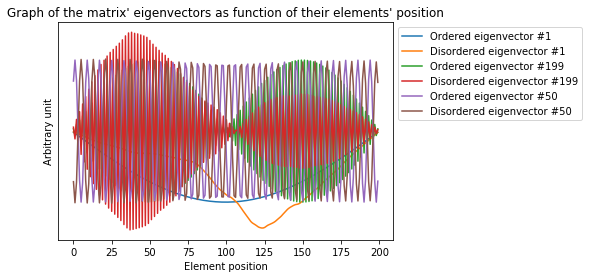

In [1]:
from matplotlib import pyplot as plt # Import pyplot as plt from the library matplotlib
import numpy as np # Import the library numpy under the name np
import math as mt
%matplotlib inline
 
# Allows us to plot graphs in the notebook

n = int(input("Size of the matrix: \n")) # Size of the matrix
print("\n")
I0 = float(input("Main diagonal's value: \n")) # Set value for the main diagonal
print("\n")
I1 = float(input("Secondary diagonals' value: \n")) # Set value for the second and third diagonals
print("\n")
 
A = np.eye(n, n, k=-1)*I1 + np.eye(n, n)*I0 + np.eye(n, n, k=1)*I1  # Tridiagonal matrix without disorder

#print("Ordered matrix: \n", A) # Shows the ordered matrix
 
eigenvalues, eigenvectors = np.linalg.eigh(A) # Get the eigenvectors and eigenvalues of the ordered matrix

idx = eigenvalues.argsort()[::-1]  # The 2 following blocks are here to return the order
eigenvalues = eigenvalues[idx] # in which the eigenvectors are indexed so that the graph will show
eigenvectors = eigenvectors[:,idx] # eigenvector #1 as eigenvector #1 and not eigenvector #200 etc.

#print("\n")
#print("Matrix of ordered eigenvectors: \n", eigenvectors) # Matrix of ordered eigenvectors
#print("\n")
#print("Matrix of ordered eigenvalues: \n", eigenvalues) # Array of ordered eigenvalues
#print("\n")

K = int(input("# of eigenvectors graphed: \n")) # Get the number of eigenvectors to graph on a same plot, starting with the 1st eigenvecto
print("\n") 

y = [] # Creates an empty list that'll be used to store which ordered eigenvectors will be graphed

for o in range(0, K): # Creates the command to the user that asks which eigenvectors will be graphed
    x = int(input("Which eigenvector do you want to graph?: \n")) # Asks the index of each eigenvectors the user wants to graph
    y.append(x-1) # Append the index of the eigenvector to the list
    print("\n")

h = float(input("Max randomness: \n")) # Coefficient setting the maximum randomness
print("\n")

isvalid = False # Will test that the following user input is correct
while not isvalid: # not will test if isvalid is false, if so, it'll run the following code till isvalid is true
    I2bis = (input("Disorder in the main diagonal? (y/n) \n")) # Will decide what coefficient I2 will be (0 or 1)
    I2bis = I2bis.upper() # Ensures uniformity in the way the command is written
    if I2bis == 'YES' or I2bis == '1' or I2bis == 'Y': # Checks for positive input of the argument
        I2 = 1 # Will ensure the main diagonal of the matrix 't' is made of ones
        isvalid = True # Stops the loop
    elif I2bis == 'NO' or I2bis == '0' or I2bis == 'N': # Checks for negative input of the argument
        I2 = 0 # Will ensure the main diagonal of the matrix 't' is made of zeros
        isvalid = True # Stops the loop
    else: print("Invalid entry, please type in a valid entry (y, yes, 1, n, no, 0).") # If input is incorrect, rerun the loop
    print("\n")

isvalid = False # Will test that the following user input is correct
while not isvalid: # not will test if isvalid is false, if so, it'll run the following code till isvalid is true
    I3bis = (input("Disorder in the secondary diagonals? (y/n) \n")) # Will decide what coefficient I2 will be (0 or 1)
    I3bis = I3bis.upper() # Ensures uniformity in the way the command is written
    if I3bis == 'YES' or I3bis == '1' or I3bis == 'Y': # Checks for positive input of the argument
        I3 = 1 # Will ensure the secondary diagonals of the matrix 't' is made of ones
        isvalid = True # Stops the loop
    elif I3bis == 'NO' or I3bis == '0' or I3bis == 'N': # Checks for negative input of the argument
        I3 = 0 # Will ensure the secondary diagonals of the matrix 't' is made of zeros
        isvalid = True # Stops the loop
    else: print("Invalid entry, please type in a valid entry (y, yes, 1, n, no, 0).") # If input is incorrect, rerun the loop
    print("\n")

d = np.random.rand(n,n)*h # Generates a matrix of random numbers in range of 0 to 1, multiplied by the actual max randomness
#print("Random matrix: \n", d) # Shows the array of random numbers
#print("\n")

t = np.eye(n, n, k=-1)*I3 + np.eye(n, n)*I2 + np.eye(n, n, k=1)*I3  # Unitary matrix that'll multiply the random matrix to get a disordered tridiagonal matrix
#print("Multiplicative (t-)matrix to multiply the random matrix: \n", t)
#print("\n")

w = d*t # (Tri)diagonal random matrix
#print("Diagonal random matrix: \n", w) # Checks the (tri)diagonal random matrix
#print("\n")

C = A + w # Add the random matrix and the ordered matrix together
#print("Localized matrix: \n", C) # Show the localized matrix
#print("\n")

p, q = np.linalg.eigh(C) # Get the eigenvectors and eigenvalues of the localized matrix
 
idx = p.argsort()[::-1] # 2nd block. This line sorts the indexes in reverse
p = p[idx] # This line sorts the eigenvalues in reverse
q = q[:,idx] # This line sorts the eigenvectors in reverse

#print("\n")
#print("Matrix of localized eigenvectors: \n", q) # Matrix of localized eigenvectors
#print("\n")
#print("Matrix of localized eigenvalues: \n", p) # Array of localized eigenvalues
#print("\n")

eigenvector = [] # Array of one eigenvector from the ordered eigenvectors matrix
Q = [] # Array of one eigenvector from the random eigenvectors matrix

for j in y: # For J taking each value in the list of input eigenvectors index
    H = j+1 # Used to store the actual index number of the eigenvector that is being considered
    eigenvector = eigenvectors[:,j] # Creates an array with the value of each element constituting the eigenvector that is being considered
#    print("Array of ordered eigenvector #%s: \n" %(H), eigenvector) # To check the eigenvector array
#    print("\n")
    plt.plot(eigenvector, label="Ordered eigenvector #%s" %(H))  # Plot the ordered eigenvector
    Q = q[:,j] # Creates an array with the value of each element constituting the eigenvector that is being considered
#    print("Array of disordered eigenvector #%s: \n" %(H), Q) # To check the eigenvector array
#    print("\n")
    plt.plot(Q, label="Disordered eigenvector #%s" %(H)) # Plot the ordered eigenvector

if K != 0: # So that it doesn't return an empty graph if K = 0
    #plt.grid() # Add a grid to the graph
    plt.title("Graph of the matrix' eigenvectors as function of their elements' position") # Graph's title
    plt.xlabel("Element position") # x axis' label
    plt.ylabel("Arbitrary unit") # y axis' label
    plt.yticks([]) # Removes y axis' values since they are arbitrary
    plt.legend(loc="upper left", bbox_to_anchor=(1,1)) # Legend is outside the plot
else: # If K = 0, do nothing
    pass

## Decomposed code (for debugging)

### Imports

In [ ]:
from matplotlib import pyplot as plt # Import pyplot as plt from the library matplotlib
import scipy as sp # Import the library scipy under the name sp
import numpy as np # Import the library numpy under the name np
from IPython.display import Image # Import Image from IPython's module Display to insert images in the notebook
from scipy.sparse import diags # Here for tridiagonal matrices
import random # Will be used to generate random numbers
%matplotlib inline
 
# Allows us to plot graphs in the notebook

### Input of the setting

In [ ]:
n = int(input("Size of the matrix: \n")) # Size of the matrix
print("\n")
I0 = float(input("Main diagonal's value: \n")) # Set value for the main diagonal
print("\n")
I1 = float(input("Secondary diagonals' value: \n")) # Set value for the second and third diagonals
print("\n")
 
A = np.eye(n, n, k=-1)*I1 + np.eye(n, n)*I0 + np.eye(n, n, k=1)*I1  # Tridiagonal matrix without disorder

#print("Ordered matrix: \n", A) # Shows the ordered matrix
 
eigenvalues, eigenvectors = np.linalg.eigh(A) # Get the eigenvectors and eigenvalues of the ordered matrix

idx = eigenvalues.argsort()[::-1]  # The 2 following blocks are here to return the order
eigenvalues = eigenvalues[idx] # in which the eigenvectors are indexed so that the graph will show
eigenvectors = eigenvectors[:,idx] # eigenvector #1 as eigenvector #1 and not eigenvector #200 etc.

#print("\n")
#print("Matrix of ordered eigenvectors: \n", eigenvectors) # Matrix of ordered eigenvectors
#print("\n")
#print("Matrix of ordered eigenvalues: \n", eigenvalues) # Array of ordered eigenvalues
#print("\n")

### Ordered eigenvectors' plots

In [ ]:
eigenvector = [] # Array of one eigenvector from the eigenvectors matrix

K = int(input("# of eigenvectors graphed: \n")) # Get the number of eigenvectors to graph on a same plot, starting with the 1st eigenvecto
print("\n") 

y = [] # Creates an empty list that'll be used to store which ordered eigenvectors will be graphed

for o in range(0, K): # Creates the command to the user that asks which eigenvectors will be graphed
    x = int(input("Which eigenvector do you want to graph?: \n")) # Asks the index of each eigenvectors the user wants to graph
    y.append(x-1) # Append the index of the eigenvector to the list
    print("\n")

for j in y: # For J taking each value in the list of input eigenvectors index
    H = j+1 # Used to store the actual index number of the eigenvector that is being considered
    eigenvector = eigenvectors[:,j] # Creates an array with the value of each element constituting the eigenvector that is being considered
#    print("Array of ordered eigenvector #%s: \n" %(H), eigenvector) # To check the eigenvector array
#    print("\n")
    plt.plot(eigenvector, label="Ordered eigenvector #%s" %(H))  # Plot the ordered eigenvector

if K != 0: # So that it doesn't return an empty graph if K = 0
    #plt.grid() # Add a grid to the graph
    plt.title("Graph of the matrix' eigenvectors as function of their elements' position") # Graph's title
    plt.xlabel("Element position") # x axis' label
    plt.ylabel("Arbitrary unit") # y axis' label
    plt.yticks([]) # Removes y axis' values since they are arbitrary
    plt.legend(loc="upper left", bbox_to_anchor=(1,1)) # Legend is outside the plot
else: # If K = 0, do nothing
    pass

### Setting of the random components

In [ ]:
h = float(input("Max randomness: \n")) # Coefficient setting the maximum randomness
print("\n")

isvalid = False # Will test that the following user input is correct
while not isvalid: # not will test if isvalid is false, if so, it'll run the following code till isvalid is true
    I2bis = (input("Disorder in the main diagonal? (y/n) \n")) # Will decide what coefficient I2 will be (0 or 1)
    I2bis = I2bis.upper() # Ensures uniformity in the way the command is written
    if I2bis == 'YES' or I2bis == '1' or I2bis == 'Y': # Checks for positive input of the argument
        I2 = 1 # Will ensure the main diagonal of the matrix 't' is made of ones
        isvalid = True # Stops the loop
    elif I2bis == 'NO' or I2bis == '0' or I2bis == 'N': # Checks for negative input of the argument
        I2 = 0 # Will ensure the main diagonal of the matrix 't' is made of zeros
        isvalid = True # Stops the loop
    else: print("Invalid entry, please type in a valid entry (y, yes, 1, n, no, 0).") # If input is incorrect, rerun the loop
    print("\n")

isvalid = False # Will test that the following user input is correct
while not isvalid: # not will test if isvalid is false, if so, it'll run the following code till isvalid is true
    I3bis = (input("Disorder in the secondary diagonals? (y/n) \n")) # Will decide what coefficient I2 will be (0 or 1)
    I3bis = I3bis.upper() # Ensures uniformity in the way the command is written
    if I3bis == 'YES' or I3bis == '1' or I3bis == 'Y': # Checks for positive input of the argument
        I3 = 1 # Will ensure the secondary diagonals of the matrix 't' is made of ones
        isvalid = True # Stops the loop
    elif I3bis == 'NO' or I3bis == '0' or I3bis == 'N': # Checks for negative input of the argument
        I3 = 0 # Will ensure the secondary diagonals of the matrix 't' is made of zeros
        isvalid = True # Stops the loop
    else: print("Invalid entry, please type in a valid entry (y, yes, 1, n, no, 0).") # If input is incorrect, rerun the loop
    print("\n")

d = np.random.rand(n,n)*h # Generates a matrix of random numbers in range of 0 to 1, multiplied by the actual max randomness
#print("Random matrix: \n", d) # Shows the array of random numbers
#print("\n")

t = np.eye(n, n, k=-1)*I3 + np.eye(n, n)*I2 + np.eye(n, n, k=1)*I3  # Unitary matrix that'll multiply the random matrix to get a disordered tridiagonal matrix
#print("Multiplicative (t-)matrix to multiply the random matrix: \n", t)
#print("\n")

w = d*t # (Tri)diagonal random matrix
#print("Diagonal random matrix: \n", w) # Checks the (tri)diagonal random matrix
#print("\n")

### Creation of the localized matrix

In [ ]:
C = A + w # Add the random matrix and the ordered matrix together
#print("Localized matrix: \n", C) # Show the localized matrix
#print("\n")

### Localized eigenvectors' plots

In [ ]:
p, q = np.linalg.eigh(C) # Get the eigenvectors and eigenvalues of the localized matrix
 
idx = p.argsort()[::-1] # 2nd block. This line sorts the indexes in reverse
p = p[idx] # This line sorts the eigenvalues in reverse
q = q[:,idx] # This line sorts the eigenvectors in reverse

#print("\n")
#print("Matrix of localized eigenvectors: \n", q) # Matrix of localized eigenvectors
#print("\n")
#print("Matrix of localized eigenvalues: \n", p) # Array of localized eigenvalues
#print("\n")

Q = [] # Array of one eigenvector from the random eigenvectors matrix

for j in y: # For J taking each value in the list of input eigenvectors index
    Q = q[:,j] # Creates an array with the value of each element constituting the eigenvector that is being considered
#    print("Array of disordered eigenvector #%s: \n" %(H), Q) # To check the eigenvector array
#    print("\n")
    plt.plot(Q, label="Disordered eigenvector #%s" %(H)) # Plot the ordered eigenvector

if K != 0: # So that it doesn't return an empty graph if K = 0
    #plt.grid() # Add a grid to the graph
    plt.title("Graph of the matrix' eigenvectors as function of their elements' position") # Graph's title
    plt.xlabel("Element position") # x axis' label
    plt.ylabel("Arbitrary unit") # y axis' label
    plt.yticks([]) # Removes y axis' values since they are arbitrary
    plt.legend(loc="upper left", bbox_to_anchor=(1,1)) # Legend is outside the plot
else: # If K = 0, do nothing
    pass

### Localization width over a # of simulations

## Bits of code

In [ ]:
A = np.zeros((n,n)) # Matrix without disorder
np.fill_diagonal(A, I0) # Changing value of main diagonal for input value
i = np.arange((n-1)) # Changing value of off-diagonal for input value
A[i,i+1] = I1
A[i+1,i] = I1

In [ ]:
try:
    question=input(" foo? ")
    i = not strtobool(question)
    break
except ValueError:
    print(" Please only enter yes or no. ")

In [ ]:
isvalid = False # Will test that the following user input is correct
while not isvalid: # not will test if isvalid is false, if so, it'll run the following code till isvalid is true
    K = input("# of eigenvectors graphed: \n") # Get the number of eigenvectors to graph on a same plot, starting with the 1st eigenvecto
    if type(K) == int and K >= 0:
        isvalid = True
    else: print("Invalid entry, please type a valid entry (positive integer expected).")
    print("\n") 

In [ ]:
# Localization width:



In [ ]:
import random
j = range(0,100)
for i in j:
    print(random.triangular(-h, h, 0))

In [ ]:
n = 200
adoawd = np.random.random_integers(-1, 1, (n,n)) # n = 200 Size of the matrix
print(adoawd)

In [ ]:
idx2 = idx+1
sigma = mt.sqrt(mt.fsum((idx2-(mt.fsum(idx2*mt.fabs(Q)**2)/mt.fsum(mt.fabs(Q)**2)))**2*mt.fabs(Q)**2)/mt.fsum(mt.fabs(Q)**2))

In [ ]:
from IPython.display import Image #Importe le module Image depuis IPython pour insérer des images dans Jupyter Notebook